<a href="https://colab.research.google.com/github/matthewbegun/MXN500/blob/main/MXN500_2024_WOR_02_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MXN500 Workshop 2 (Python)

## ENV

Python packages required for the workshop:
- pandas
- plotnine
- scikit-misc
- scikit-bio
- plus dependencies

If any are not installed use the `!pip` command to install them first.

Ensure the `Ecology2.csv` file is uploaded.

In [17]:
# need scikit-misc for curve fitting
!pip install scikit-misc scikit-bio

  Using cached scikit-bio-0.5.9.tar.gz (3.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.8 MB/s eta 0:00:00
  Created wheel for scikit-bio: filename=scikit_bio-0.5.9-cp310-cp310-linux_x86_64.whl size=2469063 sha256=f9c770f07944de9b2f61ce5306ddb2afd080b7609a60ca2e11dd5feb34c0904e
  Stored in directory: /root/.cache/pip/wheels/77/72/2c/993efbb4d69a86bee422bc96e4e2f1ec9af7cc596a08bb86e1
  Created wheel for hdmedians: filename=hdmedians-0.14.2-cp310-cp310-linux_x86_64.whl size=677311 sha256=ccb5b6cdedadd70049b2a31aaf549e58ca6cd31c0393ae8942e49ae79fdb29c3
  Stored in directory: /root/.

In [1]:
## Week 2 Workshop
## Visualisation of Ecology data
# pandas is our python equivalent to tidyverse
import pandas as pd

# plotnine is the python implementation of ggplot2
import plotnine as p9
from plotnine import ggplot, aes, geom_histogram, geom_point, geom_bar, geom_col, geom_smooth, facet_wrap, xlab, ylab, theme_bw

# common plotting package is seaborn
import seaborn as sns

# dispaly all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Activity 1 – Reading in data
Ecology = pd.read_csv("drive/MyDrive/mxn500/data/Ecologyv2.csv")
Ecology

,Location,Site,Richness,Parastacidae,Palaemonidae,Atyidae,snail,worm,flatworm,Belostomatidae,...,Cond,pH,Temp,Substrate,CoverIn,CoverOver,CoverRiparian,SuscErosion,AquaticLife,Disturb
0,Cedar Creek,C1,11,4,28,112,0,0,0,4,...,239,6.50,15.5,cobble,leaves,canopy,rush/sed,good,low,park
1,Cedar Creek,C2,14,0,1,66,4,0,0,5,...,258,6.80,16.4,fine grav,rock/grav,canopy,rush/sedge,good,low,park
2,Cedar Creek,C3,13,5,14,35,9,0,8,0,...,216,6.90,16.3,cobble,rock/grav,veg/bank,tree,good,mod,park
3,Cedar Creek,C4,15,1,23,75,20,0,4,0,...,252,7.10,16.3,cobble,rock,canopy,tree/grass,good,low,farm road
4,Cedar Creek,C5,15,0,9,163,36,0,0,10,...,220,7.80,15.9,cobble,rock/grav,canopy,grasses,good,mod,farm road
5,Cedar Creek,C6,12,0,29,97,0,0,12,0,...,233,7.30,15.3,cobble,rock/grav,canopy,herb/grass,good/poor,mod,farm
6,South Pine River,S1,5,0,0,10,2,0,0,0,...,480,7.30,17.2,cobble,rock/grav,canopy,tree/sed,poor,mod,rural resid
7,South Pine River,S2,10,0,0,61,15,0,10,0,...,550,7.30,17.4,med gravel,leaves,canopy,grass/bare,good,mod,rural resid
8,South Pine River,S3,9,0,0,12,10,0,0,0,...,506,7.20,17.4,med sand,algae,none,vines,poor,mod,resid road
9,South Pine River,S4,7,0,0,54,0,0,0,0,...,560,7.00,17.0,med sand,rock/grav,bank,vines,good,mod,rural resid


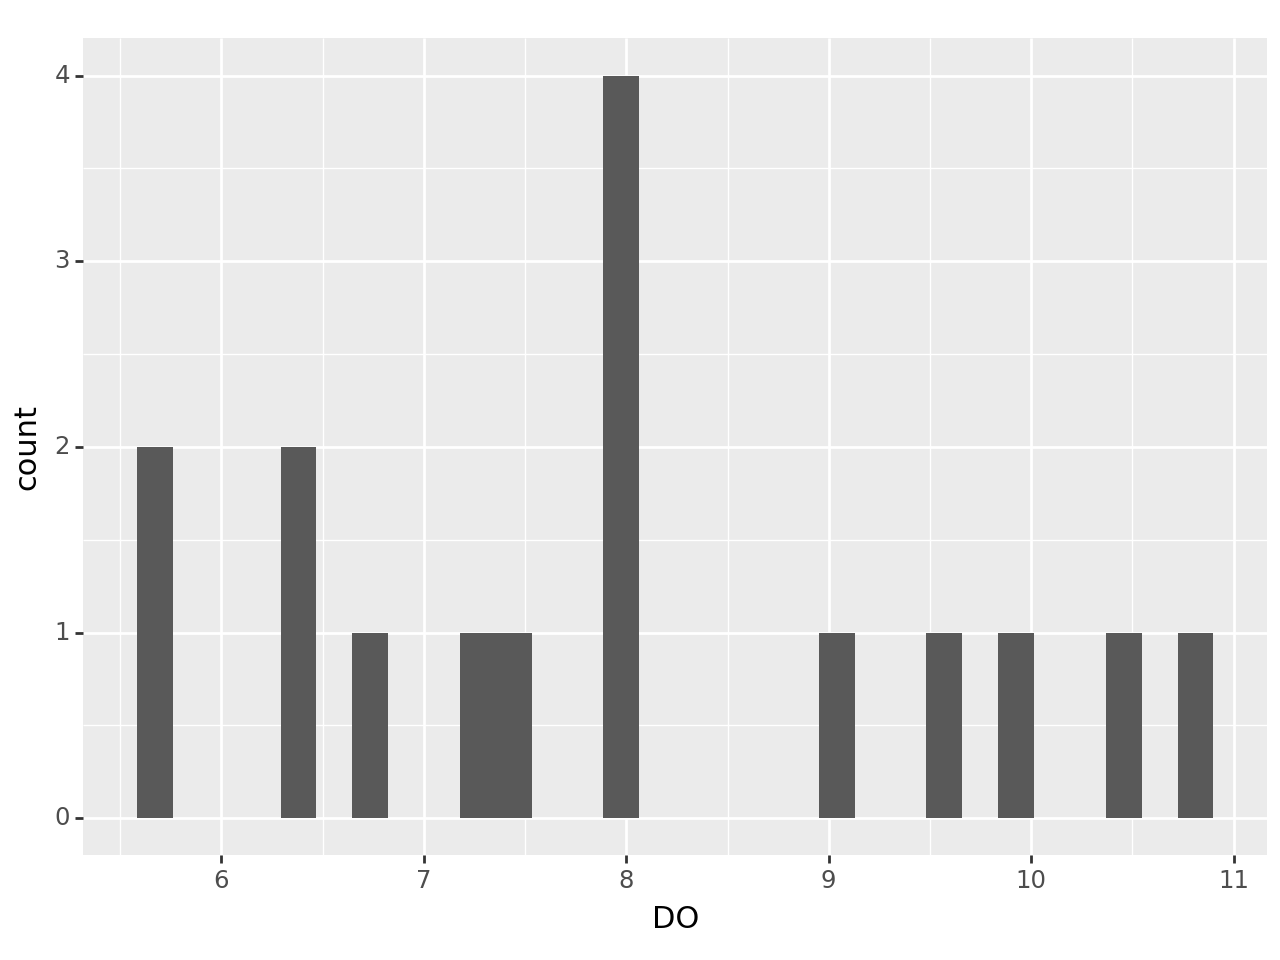

<Figure Size: (640 x 480)>

<Axes: xlabel='DO', ylabel='Count'>

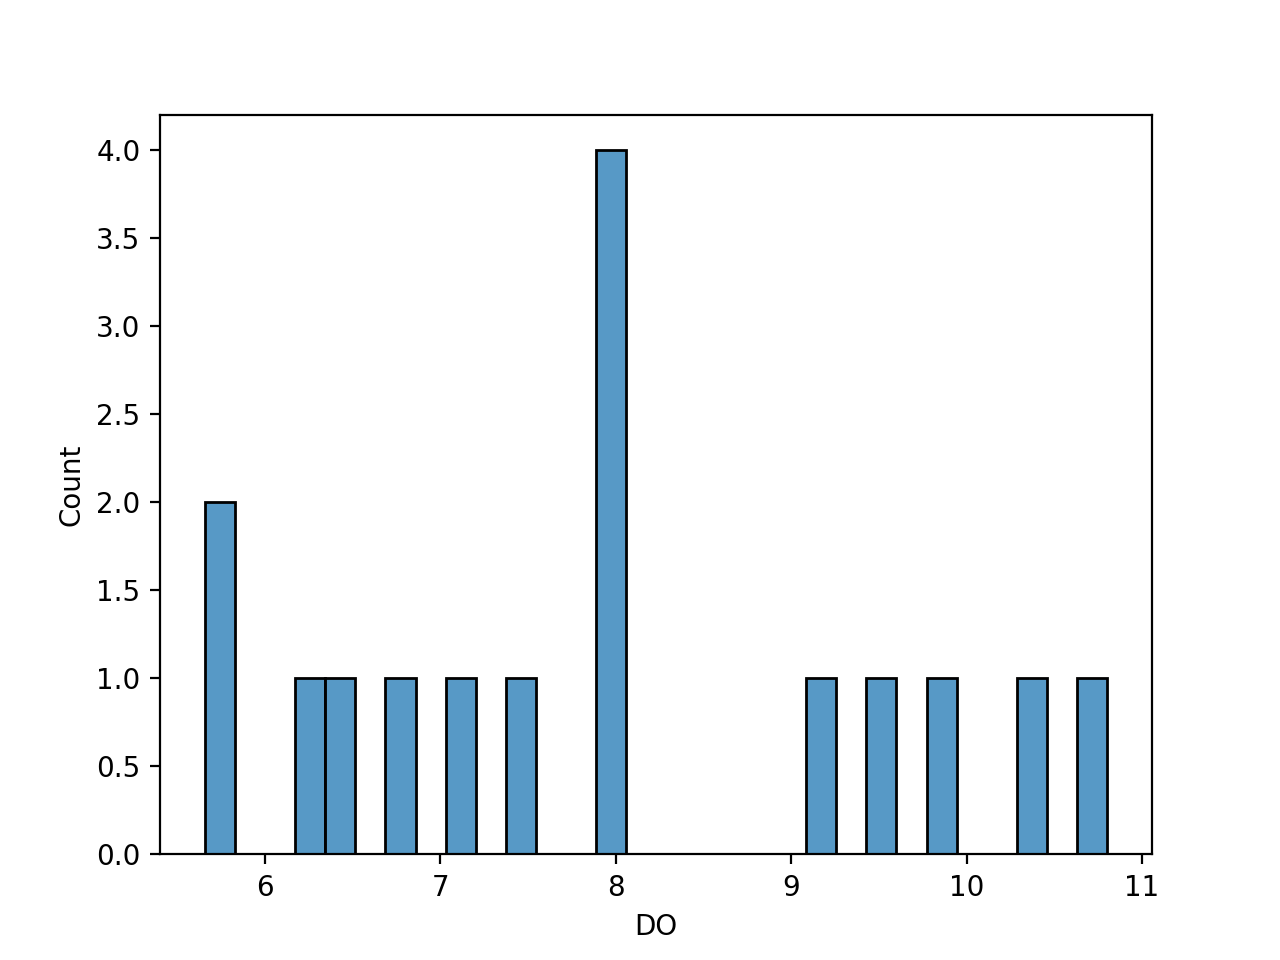

In [3]:
# Activity 2 – Building a plot
# to use the `+` format, we need to place the ggplot call inside of brackets
# so Python doesn't complain about indentation
(
  ggplot(Ecology, aes(x="DO",))
  + geom_histogram(bins=30)
)

# seaborn version
sns.histplot(Ecology, x='DO', bins=30)


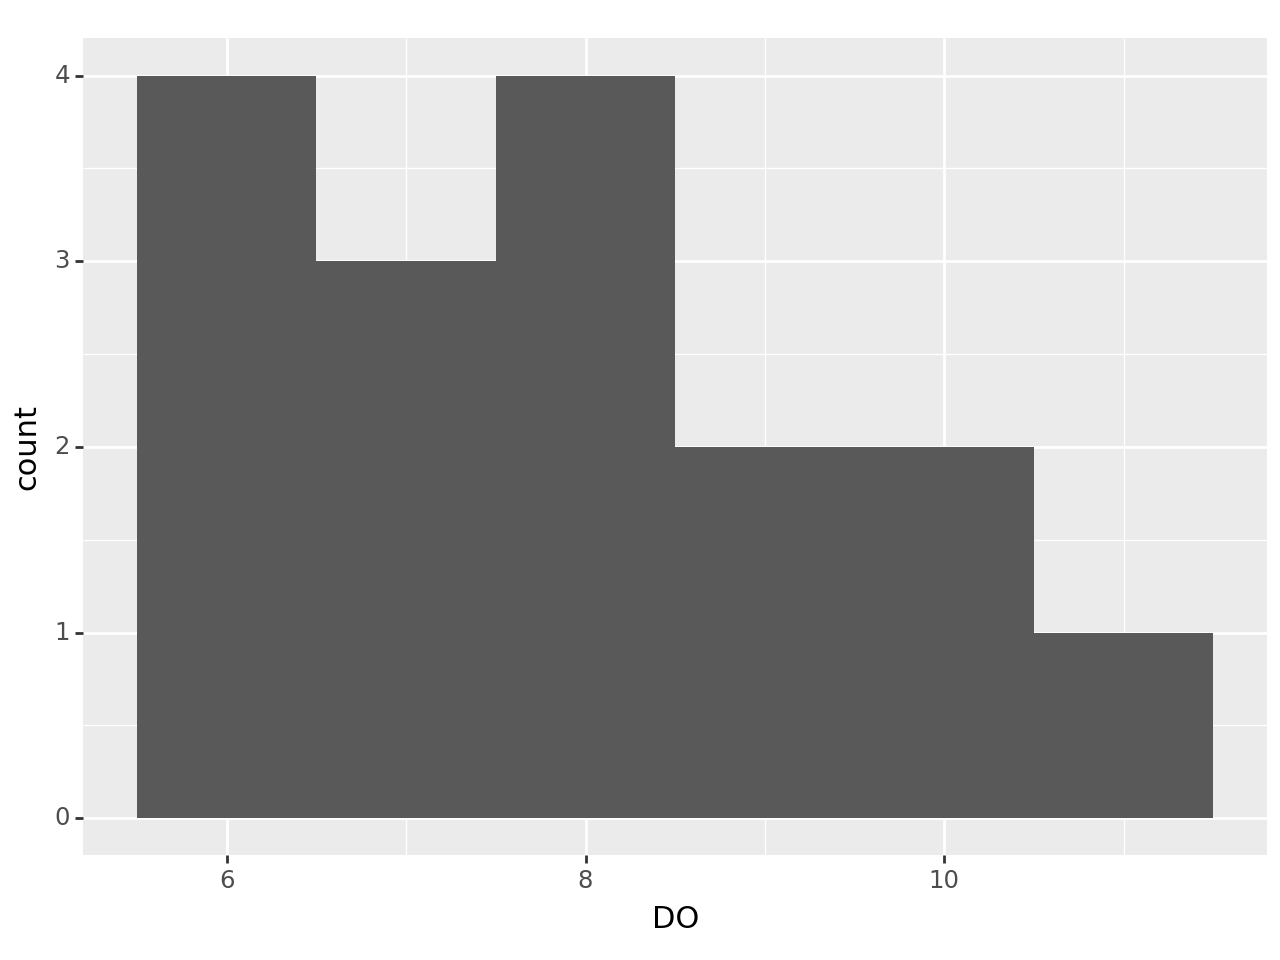

<Figure Size: (640 x 480)>

<Axes: xlabel='DO', ylabel='Count'>

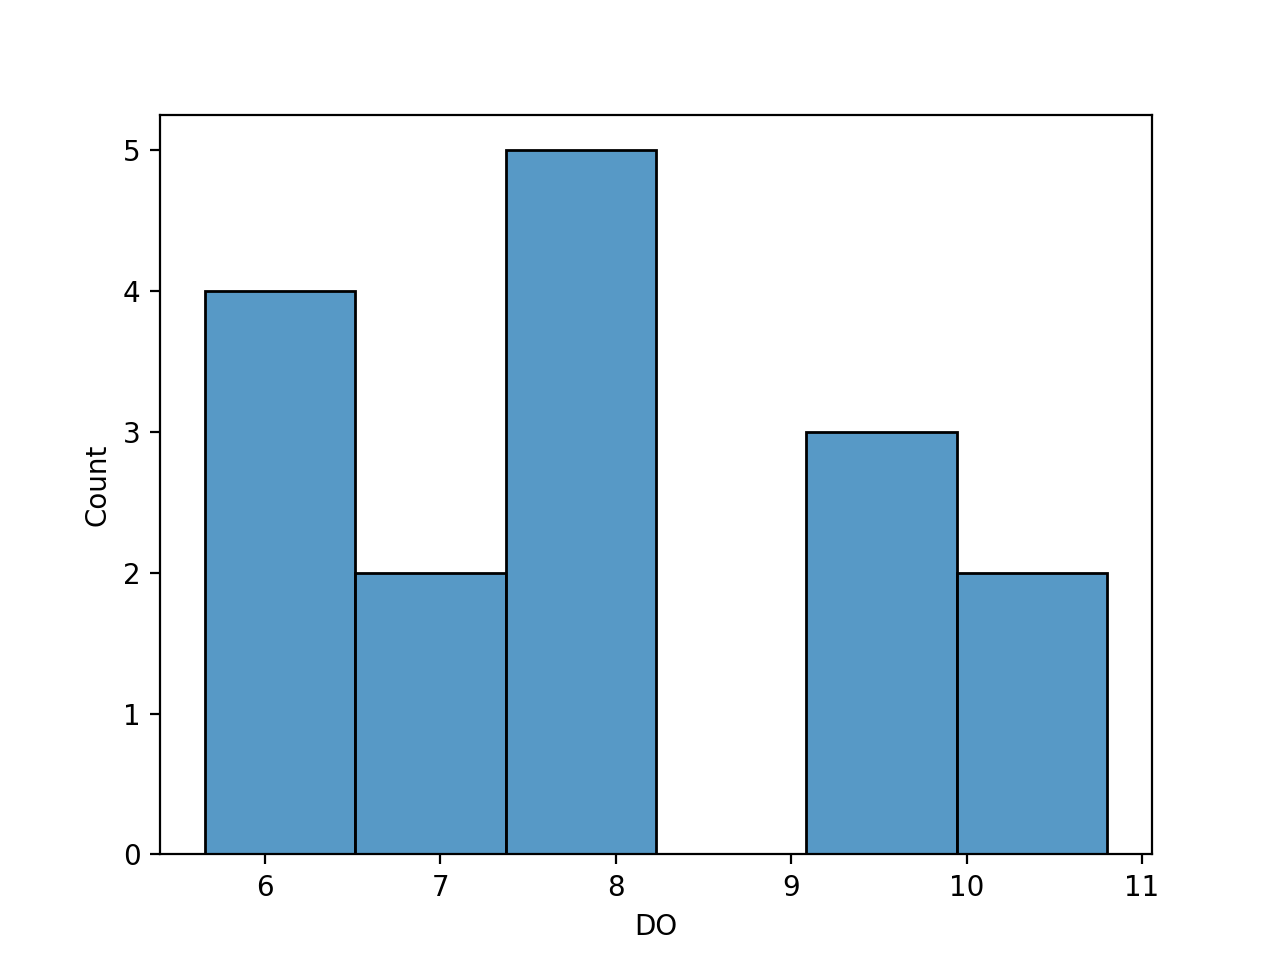

In [6]:
# let's fix the binwidths
(
  ggplot(Ecology, aes(x="DO",))
  + geom_histogram(binwidth=1)
)

# seaborn version IS DIFFERENT!
sns.histplot(Ecology, x='DO', bins=6)


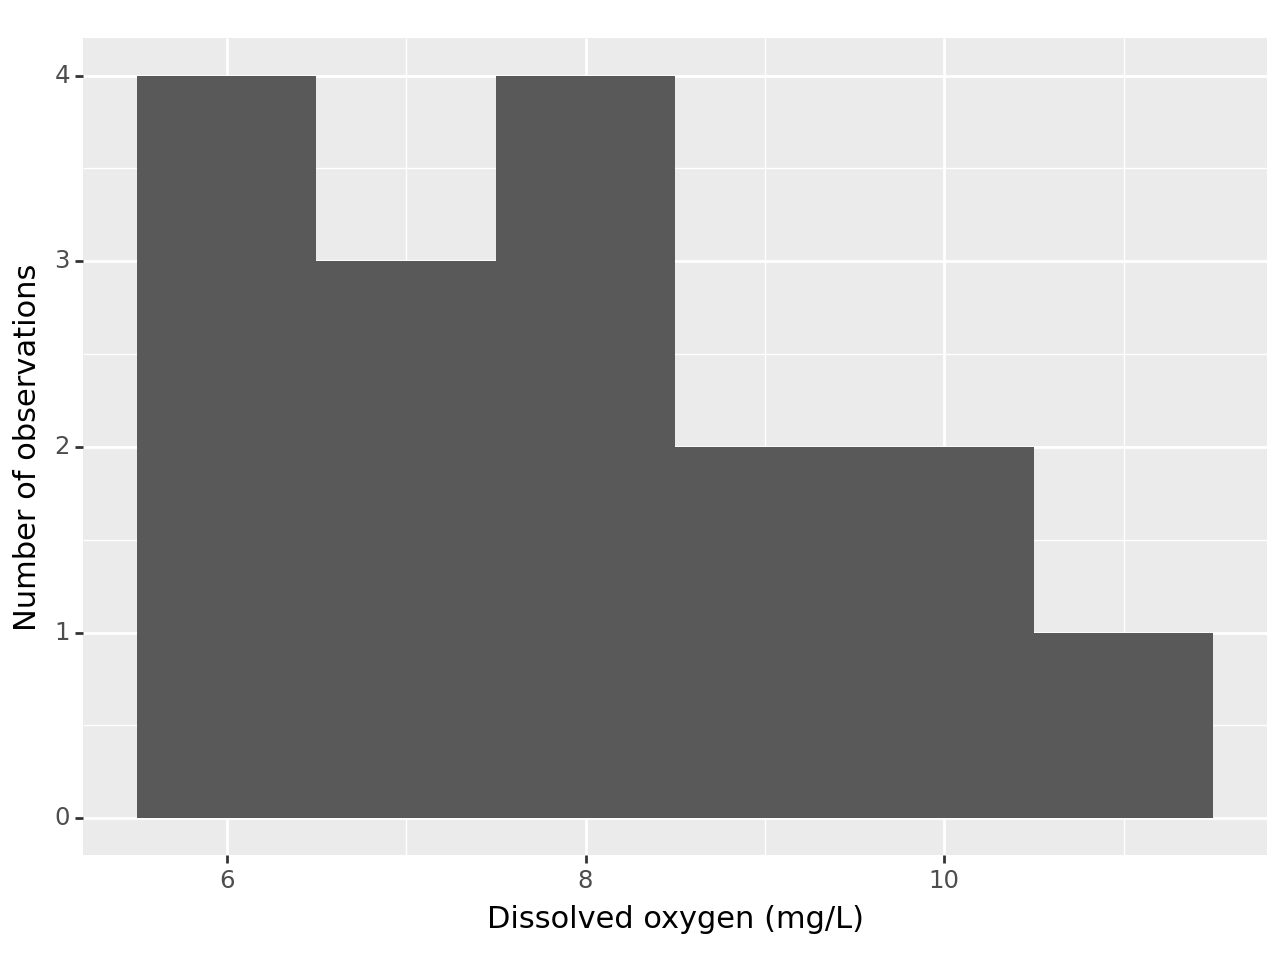

<Figure Size: (640 x 480)>

In [7]:
# let's fix the axis labels next
(
  ggplot(Ecology, aes(x="DO",))
  + geom_histogram(binwidth = 1)
  + xlab("Dissolved oxygen (mg/L)")
  + ylab("Number of observations")
)

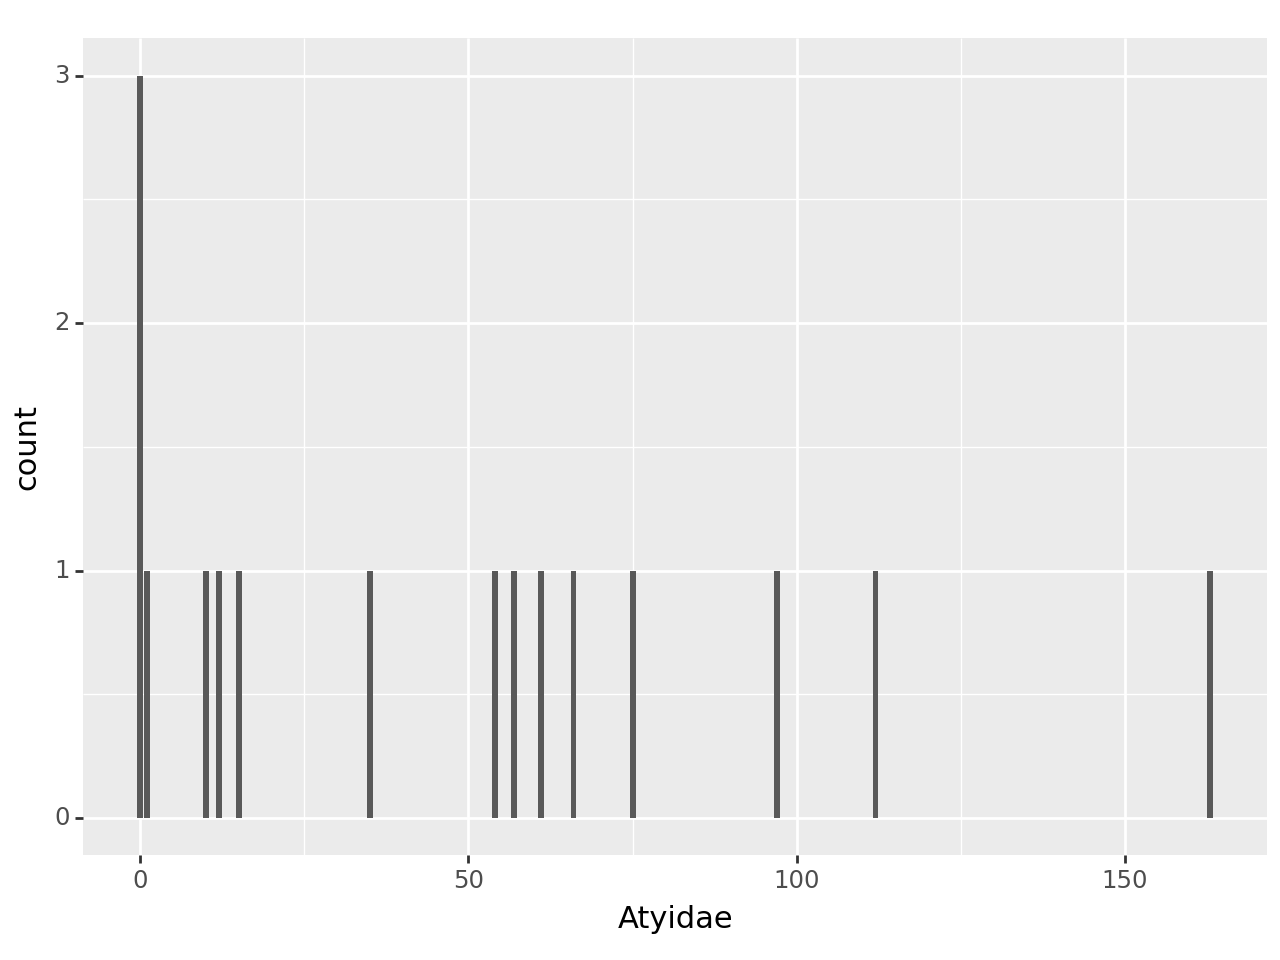

<Figure Size: (640 x 480)>

In [8]:
# Atyidae
(
  ggplot(Ecology, aes(x="Atyidae",))
  + geom_bar()
)

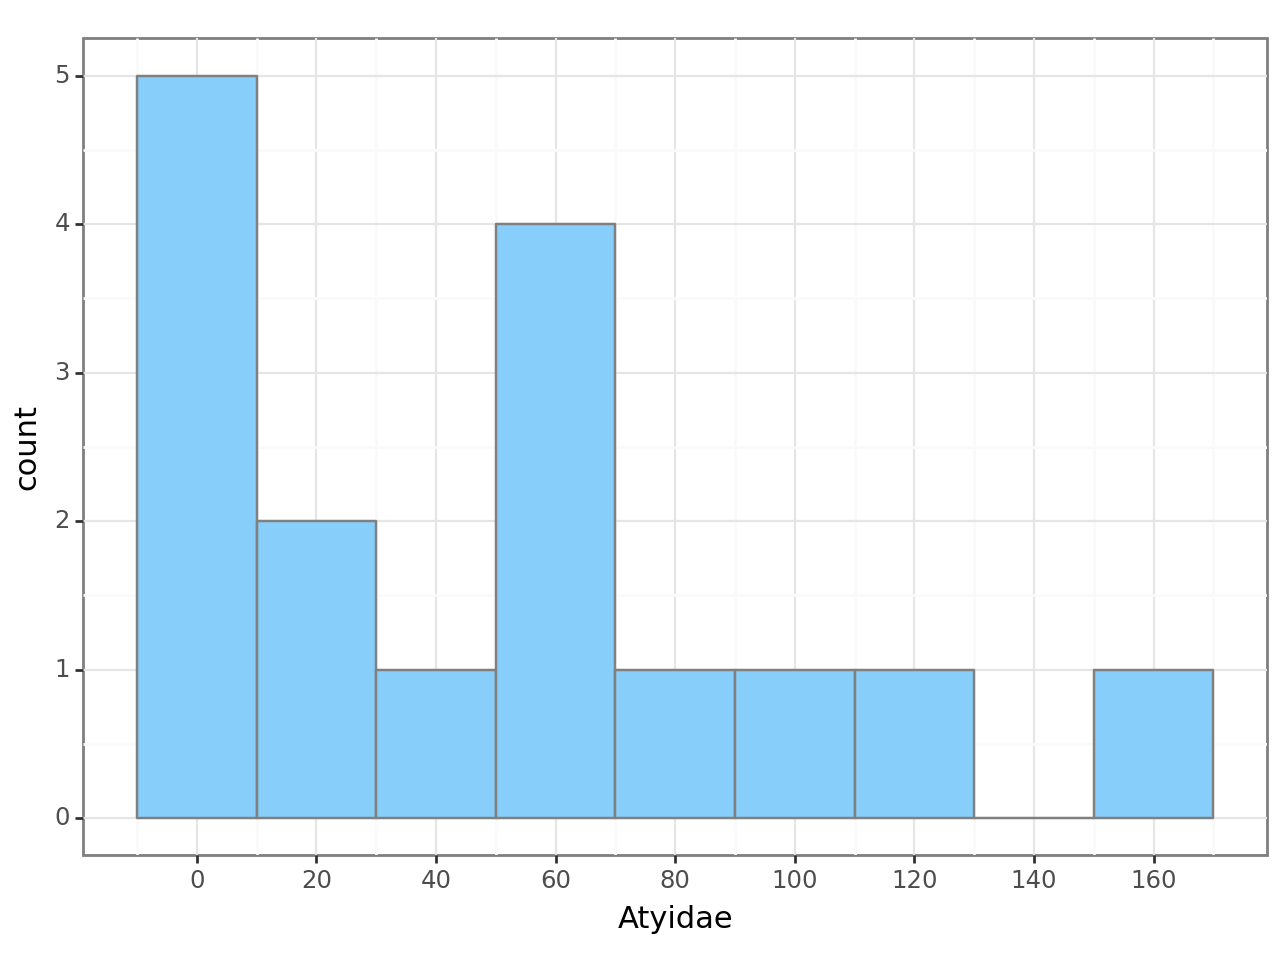

<Figure Size: (640 x 480)>

In [9]:
# let's fix this one too - moving back towards seaborns default color scheme!
(
  ggplot(Ecology, aes(x="Atyidae",))
  + geom_histogram(binwidth = 20, color = "grey", fill = "lightskyblue")
  + p9.scale_x_continuous(breaks=range(0, 161, 20))
  + theme_bw()
)

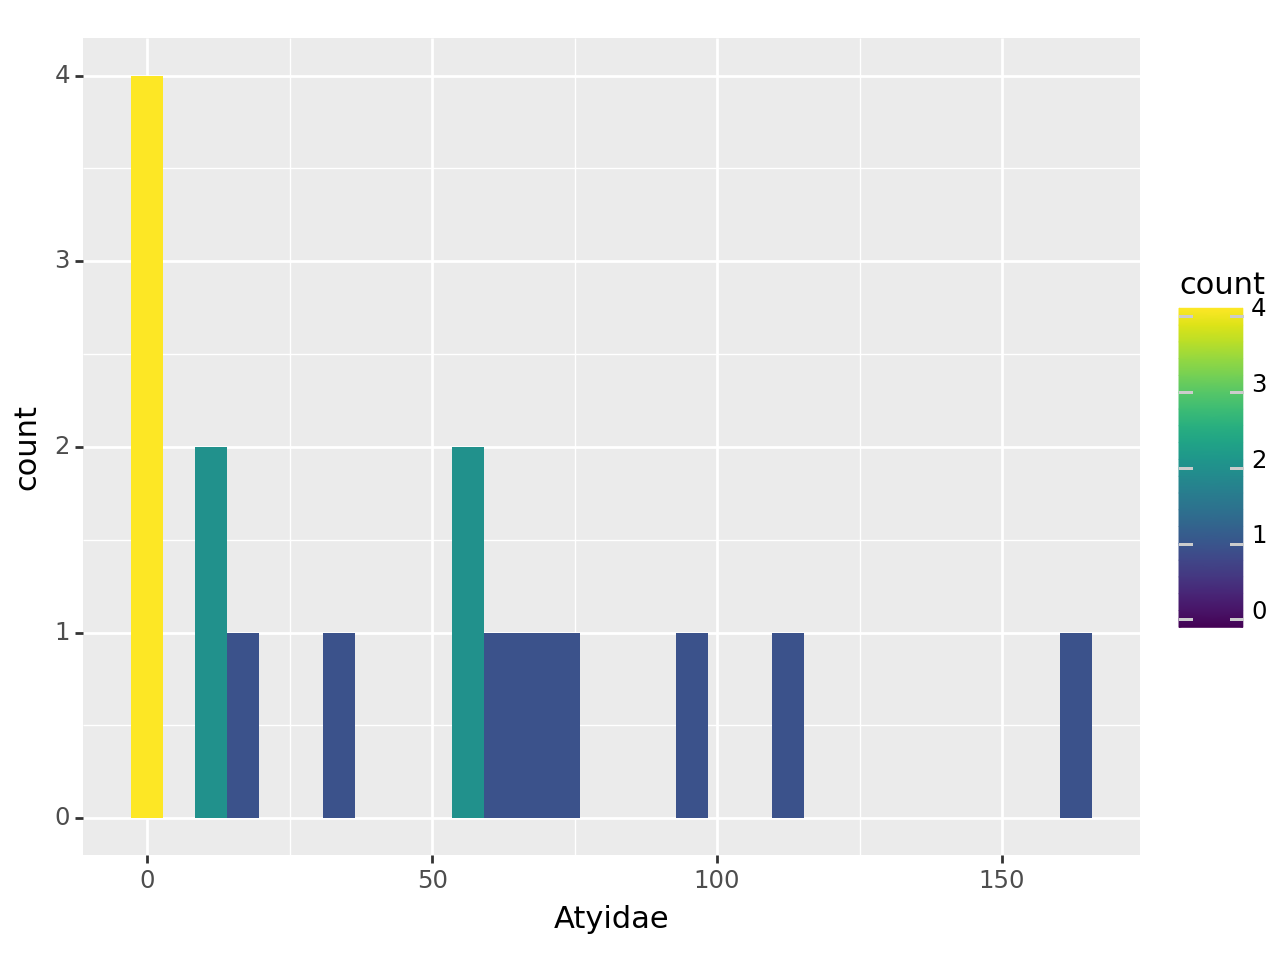

<Figure Size: (640 x 480)>

In [10]:
# change the color to be based on count - this one looks really different in python vs R
(
  ggplot(Ecology, aes(x="Atyidae",))
  + geom_histogram(aes(fill=p9.after_stat('count')), bins=30)
)

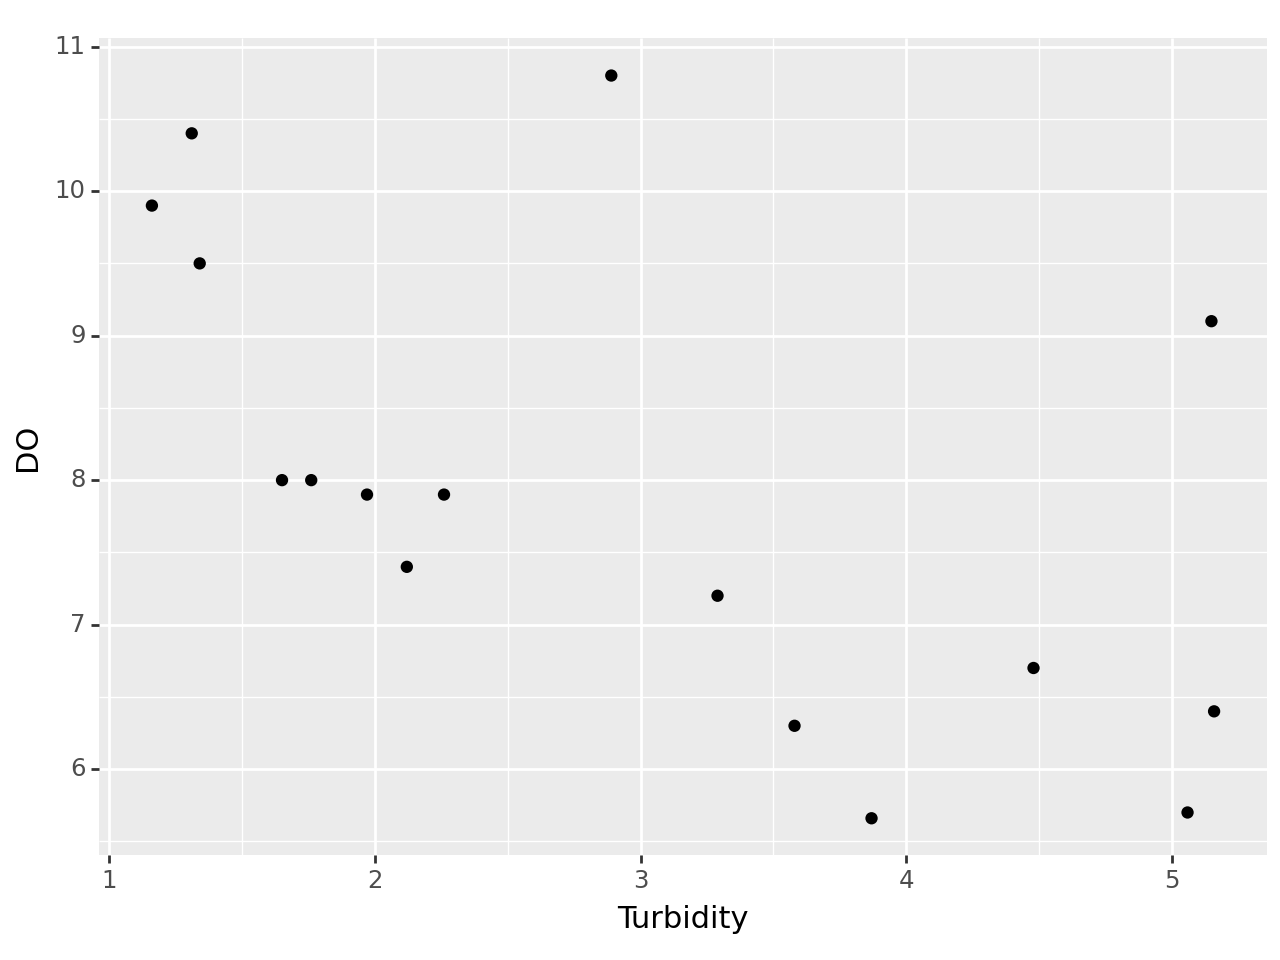

<Figure Size: (640 x 480)>

In [11]:
# now for some scatter plots (comparing 2 continuous vars)
(
  ggplot(Ecology, aes(x="Turbidity",y="DO",))
  + xlab("Turbidity")
  + geom_point()
)

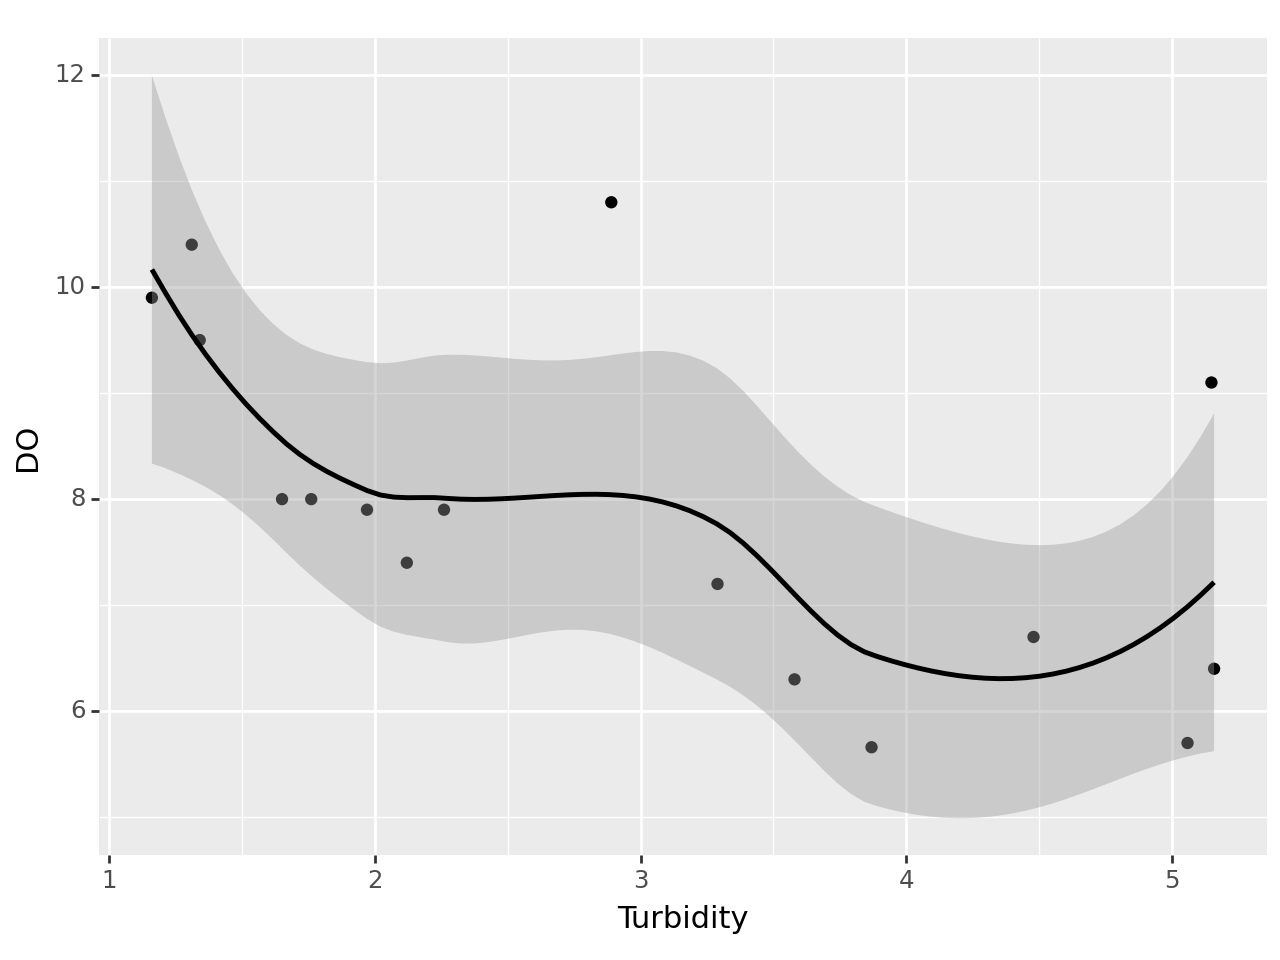

<Figure Size: (640 x 480)>

In [14]:
# this one needs scikit-misc (see pip install at start)
(
  ggplot(Ecology, aes(x="Turbidity",y="DO",))
  + xlab("Turbidity")
  + geom_point()
  + geom_smooth(method = "loess")
)

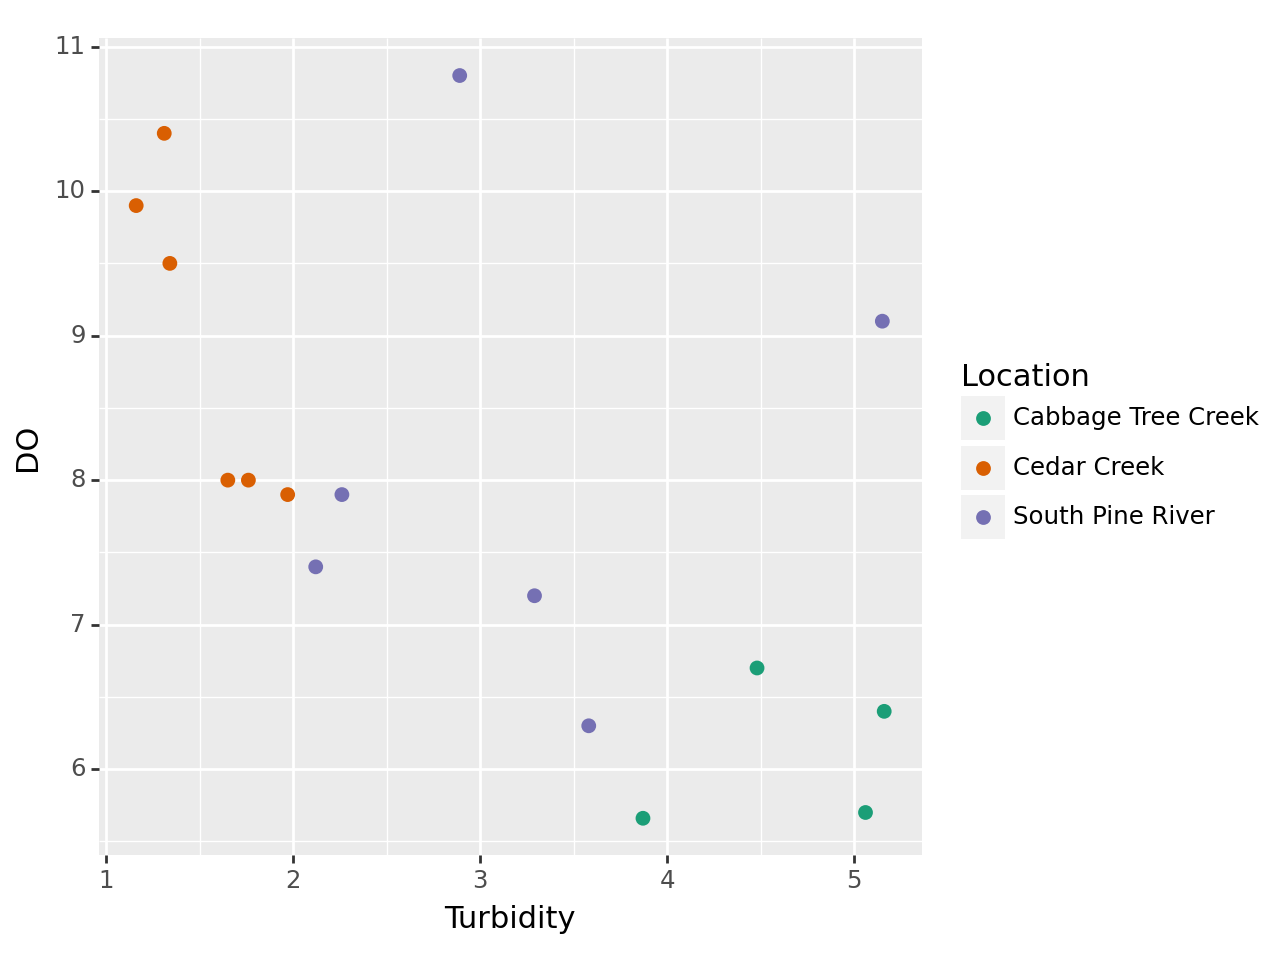

<Figure Size: (640 x 480)>

In [16]:
# in python we explicitly see that the color scheme is qualitative
# explicit is better than implicit!
(
  ggplot(Ecology, aes(x="Turbidity",y="DO",))
  + geom_point(aes(color="Location"), size=2)
  + p9.scale_color_brewer(type="qualitative", palette="Dark2",)
)

In [19]:
# have a look at column names to find the range that are species counts
Ecology.columns

Index(['Location', 'Site', 'Richness', 'Parastacidae', 'Palaemonidae',
       'Atyidae', 'snail', 'worm', 'flatworm', 'Belostomatidae', 'Mesovelidae',
       'Notonectidae', 'Corixidae', 'Hydrometridae', 'Gerridae', 'Veliidae',
       'Gyrinidae', 'Haliplidae', 'Psephenidae', 'Dytiscidae', 'Aeshnidae',
       'Corduliidae', 'Zygoptera', 'Trichoptera', 'Ephemeroptera',
       'Megaloptera', 'Chironimidae', 'Plecoptera', 'Turbidity', 'DO', 'Cond',
       'pH', 'Temp', 'Substrate', 'CoverIn', 'CoverOver', 'CoverRiparian',
       'SuscErosion', 'AquaticLife', 'Disturb'],
      dtype='object')

In [22]:
# looks like the following columns are species count
# need to specify all rows before slicing on columns
Ecology_species = Ecology.loc[:, 'Parastacidae':'Plecoptera']


In [23]:
# need scikit-bio to do taxon richness calculation - note this downgrades a few things,
# could cause issues in a large notebook
from skbio.diversity import alpha_diversity

Ecology['TaxonRichness'] = alpha_diversity('observed_otus', Ecology_species.values)
Ecology[['Site', 'TaxonRichness']]

,Site,TaxonRichness
0,C1,11
1,C2,14
2,C3,13
3,C4,15
4,C5,15
5,C6,12
6,S1,5
7,S2,10
8,S3,9
9,S4,7


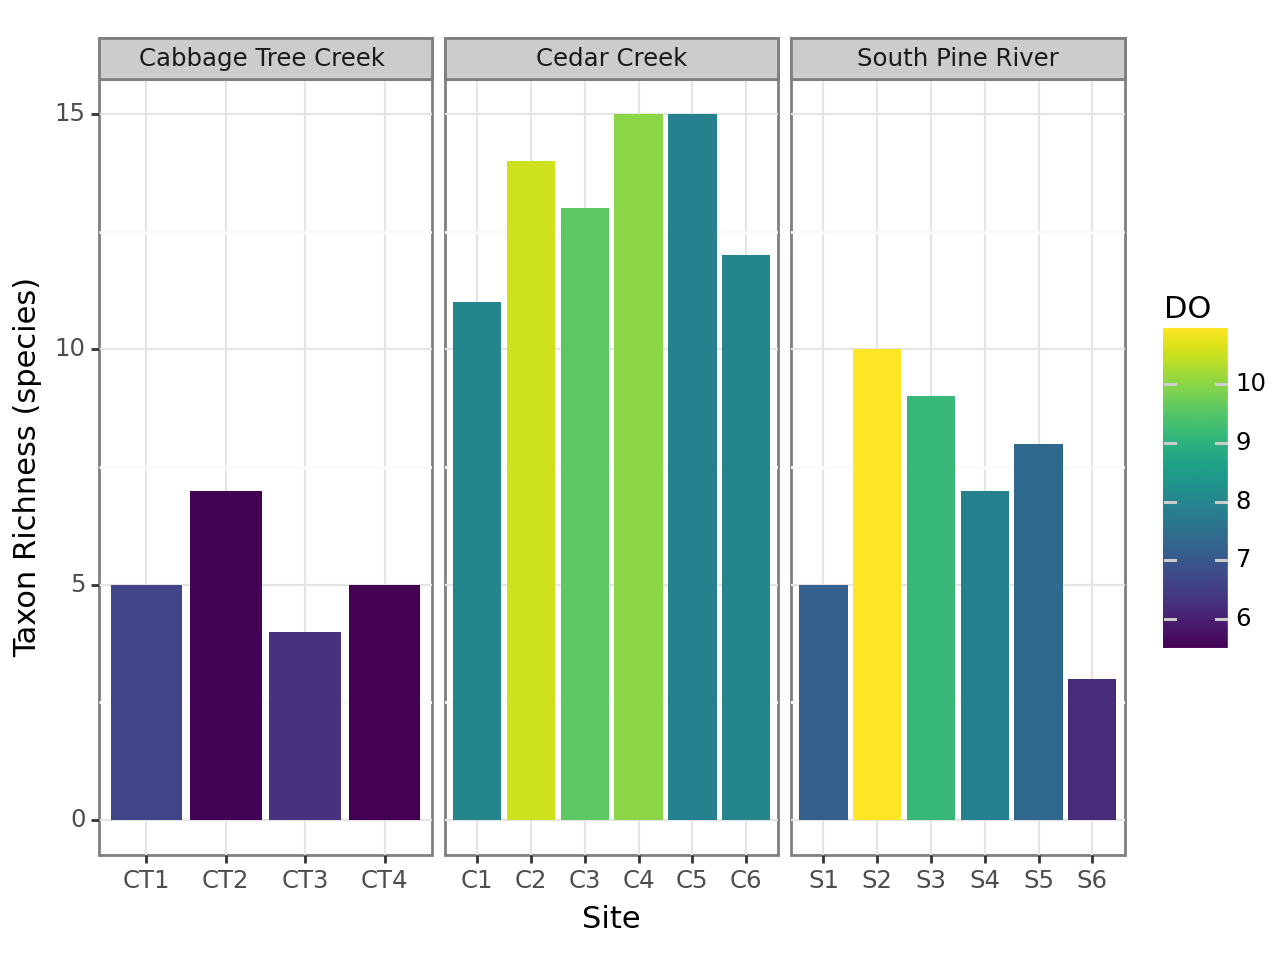

<Figure Size: (640 x 480)>

In [36]:
# My colors are different from R (and the plotnine documentation)
(
  ggplot(Ecology,
          aes(x = "Site",
              y = "TaxonRichness",
              fill = "DO"))
  + geom_col()
  + theme_bw()
  + facet_wrap(facets = "Location", nrow = 1, scales = "free_x")
  + ylab("Taxon Richness (species)")
)

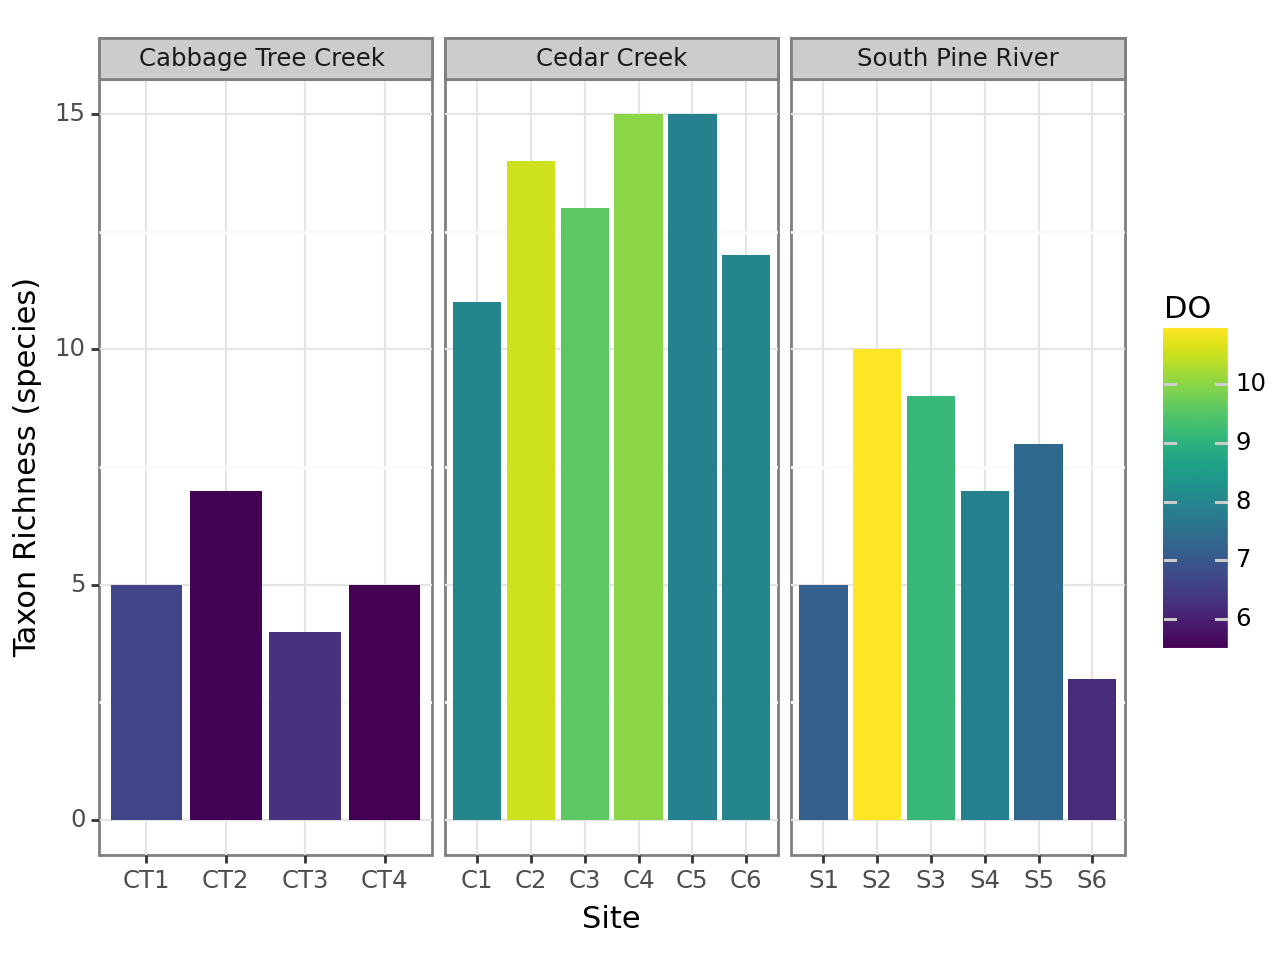

<Figure Size: (640 x 480)>

In [37]:
# What's each line doing?
(
  ggplot(Ecology, # Use the Ecology dataframe
          aes(x = "Site", #Set the x-axis to show Site
              y = "TaxonRichness", #Set the y-axis to show TaxonRichness
              fill = "DO")) #change the colour of each column to map to DO
  + geom_col() # this is the columns
  + theme_bw() # Change the background to white
  + facet_wrap(facets = "Location",  # create the facets for each of the locations
               nrow = 1, #Include only one row of plots
               scales = "free_x") #have a different x-axis on each plot
  + ylab("Taxon Richness (species)") #change the y-axis label
)



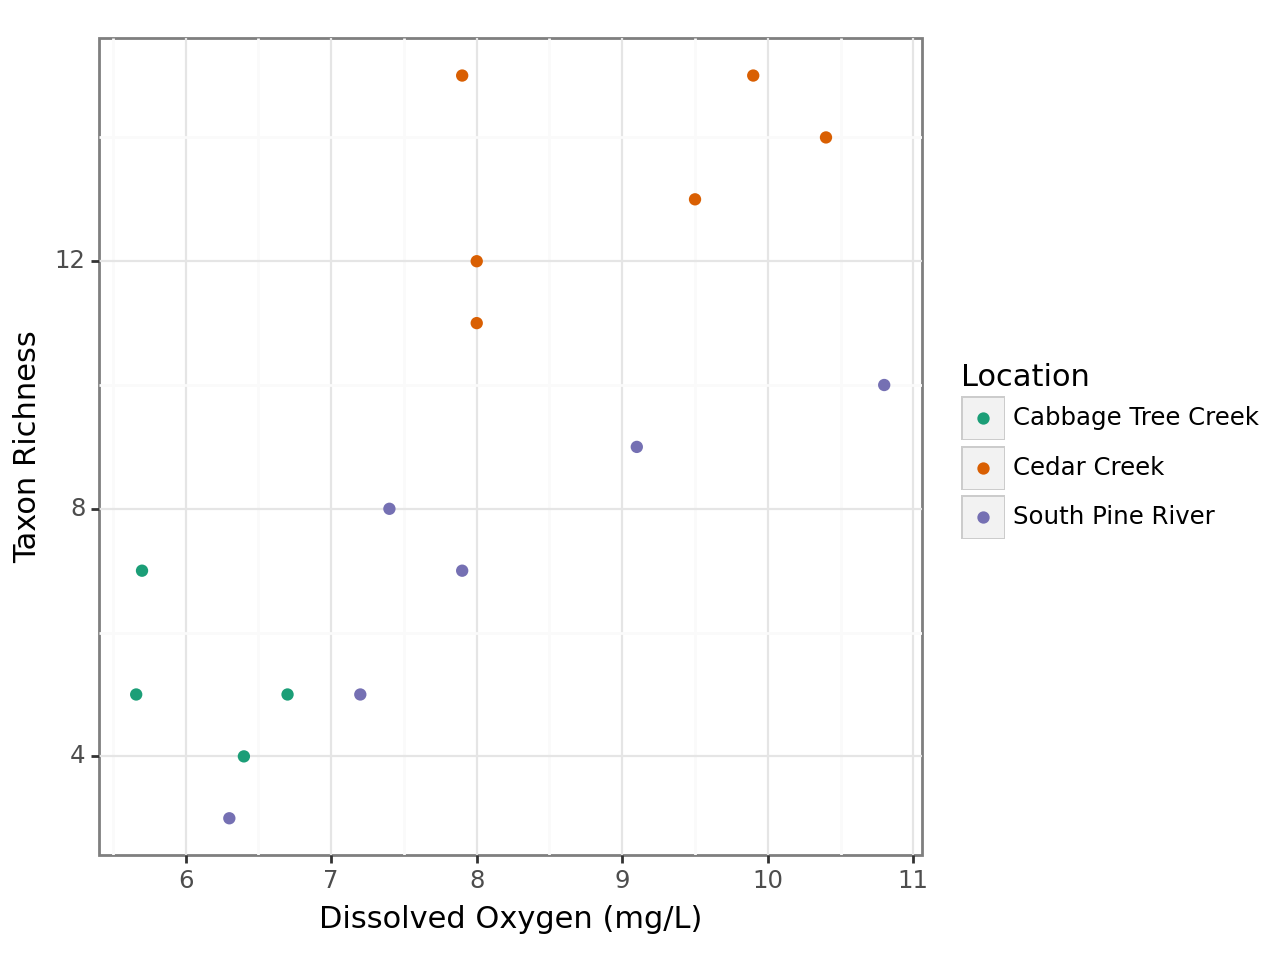

<Figure Size: (640 x 480)>

In [46]:
# Activity 5 – Making a better graph
# Let's go for a scatterplot (because two cont vars)
# (
#   ggplot(Ecology,
#           aes(x = "Site",
#               y = "TaxonRichness",
#               fill = "DO"))
#   + geom_col()
#   + theme_bw()
#   + facet_wrap(facets = "Location", nrow = 1, scales = "free_x")
#   + ylab("Taxon Richness (species)")
# )
(
  ggplot(Ecology,
         aes(x = "DO",
             y = "TaxonRichness",
             color="Location"))
  + geom_point()
  + xlab("Dissolved Oxygen (mg/L)")
  + ylab("Taxon Richness")
  + p9.scale_color_brewer(type="qualitative", palette="Dark2",)
  + theme_bw()
)